In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet, MobileNetV2
from keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
import itertools
import os
import shutil
import random
from sklearn.metrics import confusion_matrix

In [3]:
#first way to load the data
img_height = 224
img_width = 224
batch_size = 10

ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\Sujata\CompScience\Winter 2021\Deep Learning\Project Final\images',
    labels ='inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "training")

ds_validate = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\Sujata\CompScience\Winter 2021\Deep Learning\Project Final\images',
    labels ='inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "validation")

Found 7909 files belonging to 3 classes.
Using 6328 files for training.
Found 7909 files belonging to 3 classes.
Using 1581 files for validation.


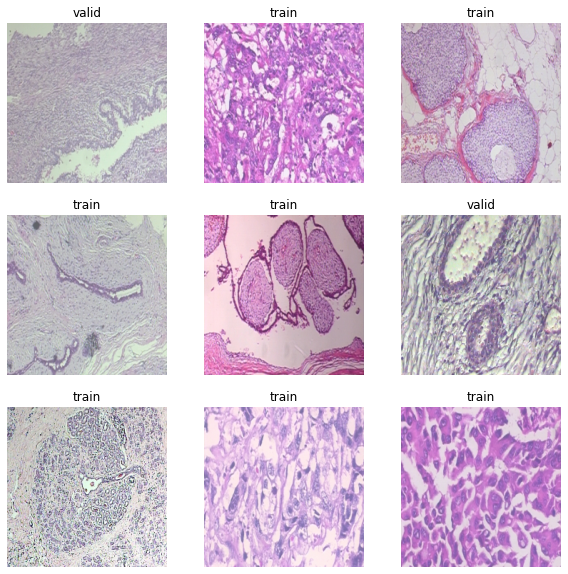

In [4]:
# Visualizing the data
class_names = ds_train.class_names

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
#Second way to load the data
#If we want the data to be broken up into Train, validation and Testing
# Change Benign and Malignant to 0 and 1 resp
os.chdir('C:\Sujata\CompScience\Winter 2021\Deep Learning\Project Final\images')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(0, 2):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random.sample(os.listdir(f'train/{i}'), 788)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
            
        test_samples = random.sample(os.listdir(f'train/{i}'), 394)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
            
os.chdir('../..')
    

In [6]:
# train/valid/test - 70/20/10
train_path = 'C:/Sujata/CompScience/Winter 2021/Deep Learning/Project Final/images/train'
valid_path = 'C:/Sujata/CompScience/Winter 2021/Deep Learning/Project Final/images/valid'
test_path = 'C:/Sujata/CompScience/Winter 2021/Deep Learning/Project Final/images/test'

train_batch = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory = train_path, target_size = (224,224), batch_size = 10)
valid_batch = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory = valid_path, target_size = (224,224), batch_size = 10)
test_batch = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory = test_path, target_size = (224,224), batch_size = 10, shuffle = False)

Found 5545 images belonging to 2 classes.
Found 1576 images belonging to 2 classes.
Found 788 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

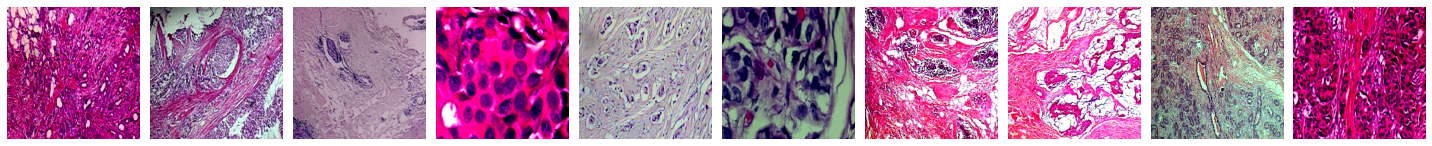

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [7]:
# Visualizing the data after the iamges were preprocessed using tf.keras.applications.mobilenet.preprocess_input
img, labels = next(train_batch)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(img)
print(labels)

In [29]:
# input the pretrained model from keras
mobile = keras.applications.MobileNet()

In [30]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [32]:
# input the pretrained model from keras without the FC layers 
x = mobile.layers[-6].output # discarding the last 6 layers
output = Dense(units = 2, activation = 'softmax')(x) # Adding the dense layer and softmax activation
model = Model(inputs = mobile.input, outputs=output) # Making a new model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [34]:
#Freezing all layers except the last 2 layers
for layer in model.layers[:-2]:
    layer.trainable = False
    
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [35]:
model.compile(optimizer = Adam(lr=0.0001), loss ='categorical_crossentropy', metrics = ['accuracy'])

In [37]:
model.fit(x=train_batch, validation_data = valid_batch, epochs = 20 , verbose = 2)

Epoch 1/20
555/555 - 186s - loss: 0.3054 - accuracy: 0.8741 - val_loss: 0.5754 - val_accuracy: 0.7291
Epoch 2/20
555/555 - 189s - loss: 0.2930 - accuracy: 0.8817 - val_loss: 0.5148 - val_accuracy: 0.7544
Epoch 3/20
555/555 - 169s - loss: 0.2822 - accuracy: 0.8885 - val_loss: 0.4791 - val_accuracy: 0.7836
Epoch 4/20
555/555 - 162s - loss: 0.2736 - accuracy: 0.8914 - val_loss: 0.4956 - val_accuracy: 0.7665
Epoch 5/20
555/555 - 178s - loss: 0.2658 - accuracy: 0.8968 - val_loss: 0.4405 - val_accuracy: 0.8065
Epoch 6/20
555/555 - 151s - loss: 0.2588 - accuracy: 0.9012 - val_loss: 0.4606 - val_accuracy: 0.7900
Epoch 7/20
555/555 - 169s - loss: 0.2532 - accuracy: 0.9024 - val_loss: 0.4505 - val_accuracy: 0.7957
Epoch 8/20
555/555 - 160s - loss: 0.2477 - accuracy: 0.9062 - val_loss: 0.4381 - val_accuracy: 0.8033
Epoch 9/20
555/555 - 157s - loss: 0.2428 - accuracy: 0.9078 - val_loss: 0.4367 - val_accuracy: 0.8052
Epoch 10/20
555/555 - 179s - loss: 0.2381 - accuracy: 0.9095 - val_loss: 0.4458 - 

In [101]:
#model.save('MobileNet_TransferLearning_BreakHis.h5')

In [41]:
#Set the output layer as GAP layer instead of Dense  - feature extraction
model2 = Model(inputs=model.input, outputs=model.get_layer('global_average_pooling2d_5').output)

In [42]:
train_features = model2.predict(train_batch)

In [44]:
print(train_features.shape)

(5545, 1024)


In [46]:
test_features = model2.predict(test_batch)
print(test_features.shape)

(788, 1024)
